In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Prime Com\Desktop\P2\Major_Cities_Price_Prediction_Pakistan\Data\Major_cities_data.csv")
df.drop(['index','url','remaining_installments','country','initial_amount','monthly_installment'], axis =1, inplace=True)
df = df[df['purpose'] != 'For Rent']
df.drop(['purpose'], axis=1, inplace= True)

df.head()

type        area bedroom bath       added            price  \
0  House     1 Kanal       7    6  4 days ago    PKR\n19 Crore   
1  House  14.2 Marla       6    6  4 days ago     PKR\n6 Crore   
2  House     1 Kanal       8    7  4 days ago     PKR\n7 Crore   
3  House     8 Marla       4    6  4 days ago  PKR\n2.65 Crore   
4   Flat   2.4 Marla       1    1  4 days ago     PKR\n40 Lakh   

                        location location_city   location_province  
0                    DHA Defence     Islamabad   Islamabad Capital  
1                           G-15     Islamabad   Islamabad Capital  
2                           G-16     Islamabad   Islamabad Capital  
3                           B-17     Islamabad   Islamabad Capital  
4  Islamabad - Murree Expressway     Islamabad   Islamabad Capital

In [2]:
types_to_remove = [
    'Office', 'Plot File', 'Other', 'Factory', 'Industrial Land',
    'Farm House', 'Upper Portion', 'Warehouse', 'Lower Portion',
    'Penthouse', 'Room', 'Plot Form', 'Commercial', 'Agricultural Land'
]

df = df[~df['type'].isin(types_to_remove)]


In [3]:
top_10_cities = df['location_city'].value_counts().head(10).index
df = df[df['location_city'].isin(top_10_cities)]

In [4]:
df.groupby(['location_city', 'location']).size().sort_values(ascending=False)
location_counts = df.groupby(['location_city', 'location']).size().reset_index(name='count')
location_counts

location_city          location  count
0      Faisalabad     204 Chak Road      3
1      Faisalabad          Abbaspur      1
2      Faisalabad   Abdullah Garden     10
3      Faisalabad       Abdullahpur      1
4      Faisalabad        Afghanabad      1
..            ...               ...    ...
898           Wah   Officers Colony      2
899           Wah  Shah Wali Colony      1
900           Wah         Wah Cantt    110
901           Wah     Wah Link Road      3
902           Wah   Wah to KKH Road      1

[903 rows x 3 columns]

In [5]:
# Step 1: Count listings for each (location_city, location) pair
location_pair_counts = df.groupby(['location_city', 'location']).size().reset_index(name='count')

# Step 2: Filter to keep only pairs with count >= 30
valid_pairs = location_pair_counts[location_pair_counts['count'] >= 30][['location_city', 'location']]

# Step 3: Filter original DataFrame to keep only valid (city, location) pairs
df = df.merge(valid_pairs, on=['location_city', 'location'], how='inner')


In [6]:
df.groupby(['location_city', 'location']).size().sort_values(ascending=False)
location_counts = df.groupby(['location_city', 'location']).size().reset_index(name='count')
location_counts

location_city                                           location  count
0      Faisalabad                                   Canal Expressway     71
1      Faisalabad                                         Canal Road    258
2      Faisalabad                                       Citi Housing    329
3      Faisalabad                                       Eden Gardens    140
4      Faisalabad                                       Eden Orchard     70
..            ...                                                ...    ...
118    Rawalpindi  Punjab Government Servant Housing Foundation (...     32
119    Rawalpindi                                     Satellite Town     35
120    Rawalpindi                                     Taj Residencia     42
121           Wah                                           New City    488
122           Wah                                          Wah Cantt    110

[123 rows x 3 columns]

In [7]:
df.head()

type        area bedroom bath       added            price     location  \
0  House     1 Kanal       7    6  4 days ago    PKR\n19 Crore  DHA Defence   
1  House  14.2 Marla       6    6  4 days ago     PKR\n6 Crore         G-15   
2  House     8 Marla       4    6  4 days ago  PKR\n2.65 Crore         B-17   
3  House     1 Kanal       6    6  4 days ago  PKR\n11.7 Crore  DHA Defence   
4  House     7 Marla       4    4  4 days ago   PKR\n5.8 Crore         G-13   

  location_city   location_province  
0     Islamabad   Islamabad Capital  
1     Islamabad   Islamabad Capital  
2     Islamabad   Islamabad Capital  
3     Islamabad   Islamabad Capital  
4     Islamabad   Islamabad Capital

In [8]:
import pandas as pd
import numpy as np

def convert_area_to_sqft(area_str):
    if pd.isna(area_str):
        return None

    area_str = area_str.strip().lower().replace(",", "")

    try:
        if "kanal" in area_str:
            num = float(area_str.replace("kanal", "").strip())
            return round(num * 20 * 272.25, 2)
        elif "marla" in area_str:
            num = float(area_str.replace("marla", "").strip())
            return round(num * 272.25, 2)
        elif "sq. ft." in area_str:
            num = float(area_str.replace("sq. ft.", "").strip())
            return round(num, 2)
        elif "sq. yd." in area_str:
            num = float(area_str.replace("sq. yd.", "").strip())
            return round(num * 9, 2)
        elif "acre" in area_str:
            num = float(area_str.replace("acre", "").strip())
            return round(num * 43560, 2)
        else:
            return None
    except:
        return None
df["area_sqft"] = df["area"].apply(convert_area_to_sqft)
df.drop(columns=["area"], inplace=True)

In [9]:
def convert_price_to_million(price_str):
    if pd.isna(price_str):
        return None

    price_str = price_str.replace("PKR", "").replace("\n", "").replace(",", "").strip().lower()

    try:
        if "crore" in price_str:
            num = float(price_str.replace("crore", "").strip())
            return round(num * 10, 2)  # 1 crore = 10 million
        elif "lakh" in price_str:
            num = float(price_str.replace("lakh", "").strip())
            return round(num / 10, 2)  # 10 lakh = 1 million
        elif "million" in price_str:
            num = float(price_str.replace("million", "").strip())
            return round(num, 2)
        else:
            return None
    except:
        return None
df["price_million"] = df["price"].apply(convert_price_to_million)
df.drop(columns=["price"], inplace=True)

In [10]:
df.head()

type bedroom bath       added     location location_city  \
0  House       7    6  4 days ago  DHA Defence     Islamabad   
1  House       6    6  4 days ago         G-15     Islamabad   
2  House       4    6  4 days ago         B-17     Islamabad   
3  House       6    6  4 days ago  DHA Defence     Islamabad   
4  House       4    4  4 days ago         G-13     Islamabad   

    location_province  area_sqft  price_million  
0   Islamabad Capital    5445.00          190.0  
1   Islamabad Capital    3865.95           60.0  
2   Islamabad Capital    2178.00           26.5  
3   Islamabad Capital    5445.00          117.0  
4   Islamabad Capital    1905.75           58.0

In [11]:
from datetime import datetime, timedelta
import pandas as pd
import re

# Sample data
# df['added'] = ["4 days ago", "2 days ago", "10 days ago", ...]

# Function to convert 'X days ago' → datetime
def convert_relative_date(text):
    match = re.search(r'(\d+)\s+days?\s+ago', text)
    if match:
        days = int(match.group(1))
        return datetime.today() - timedelta(days=days)
    else:
        return pd.NaT

# Apply conversion
df['added_clean'] = df['added'].apply(convert_relative_date)


<Axes: xlabel='added_clean'>

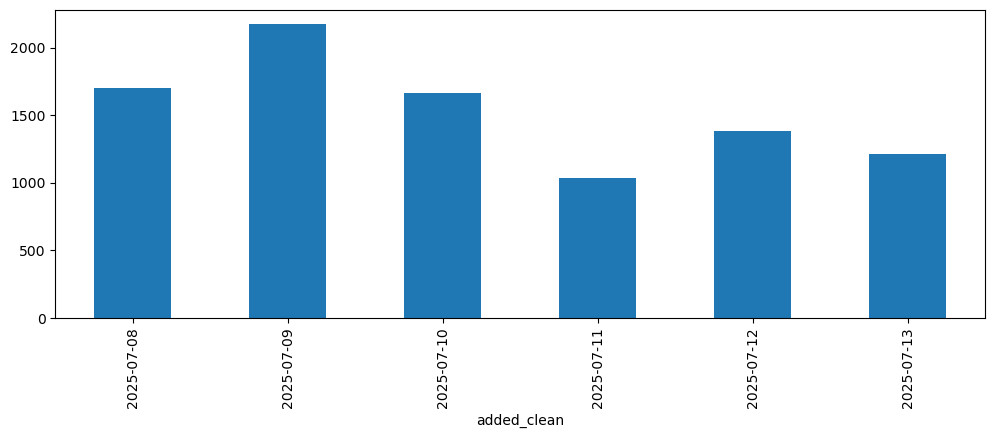

In [12]:
# Distribution by exact date
df['added_clean'].dt.date.value_counts().sort_index()

# Distribution by month
df['added_clean'].dt.to_period('M').value_counts().sort_index()

# Plot example
df['added_clean'].dt.to_period('D').value_counts().sort_index().plot(kind='bar', figsize=(12,4))


In [13]:
import pandas as pd
import re

# ✅ Convert "4 days ago" → 4
def extract_days(text):
    match = re.search(r'(\d+)', str(text))
    return int(match.group(1)) if match else None

df['days_since_posted'] = df['added'].apply(extract_days)

# ✅ Drop original 'added' column
df.drop(columns=['added','added_clean'], inplace=True)

# ✅ Final check
df.head()


type bedroom bath     location location_city   location_province  \
0  House       7    6  DHA Defence     Islamabad   Islamabad Capital   
1  House       6    6         G-15     Islamabad   Islamabad Capital   
2  House       4    6         B-17     Islamabad   Islamabad Capital   
3  House       6    6  DHA Defence     Islamabad   Islamabad Capital   
4  House       4    4         G-13     Islamabad   Islamabad Capital   

   area_sqft  price_million  days_since_posted  
0    5445.00          190.0                  4  
1    3865.95           60.0                  4  
2    2178.00           26.5                  4  
3    5445.00          117.0                  4  
4    1905.75           58.0                  4

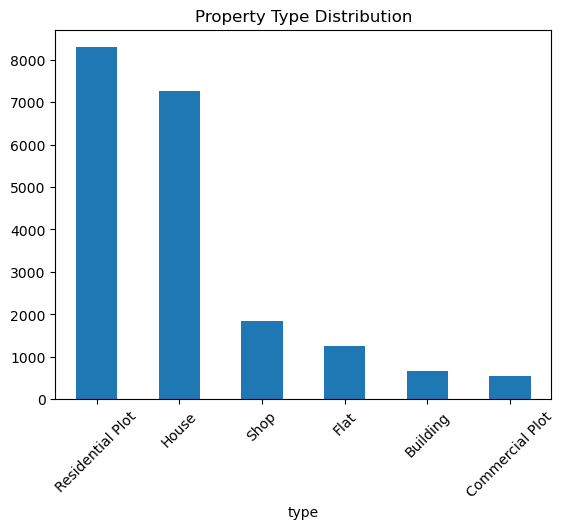

In [14]:
df["type"].value_counts().plot(kind="bar", title="Property Type Distribution")
plt.xticks(rotation=45)
plt.show()


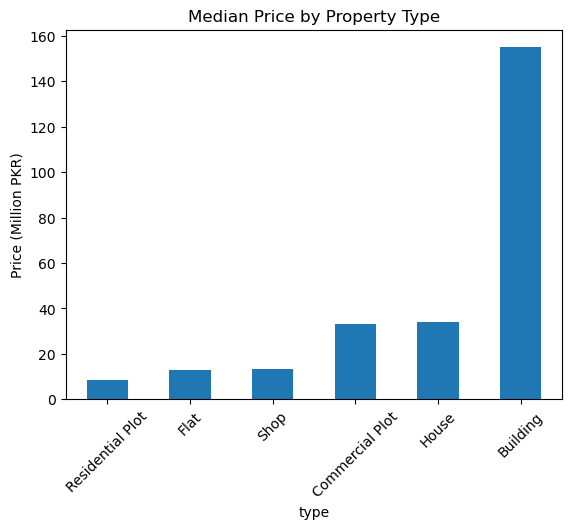

In [15]:
df.groupby("type")["price_million"].median().sort_values().plot(kind="bar", title="Median Price by Property Type")
plt.ylabel("Price (Million PKR)")
plt.xticks(rotation=45)
plt.show()

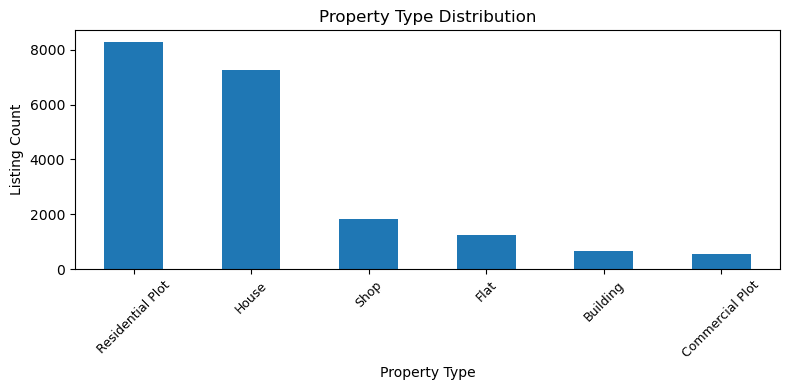

In [16]:
df["type"].value_counts().plot(kind="bar", title="Property Type Distribution", figsize=(8,4))
plt.xlabel("Property Type")
plt.ylabel("Listing Count")
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()


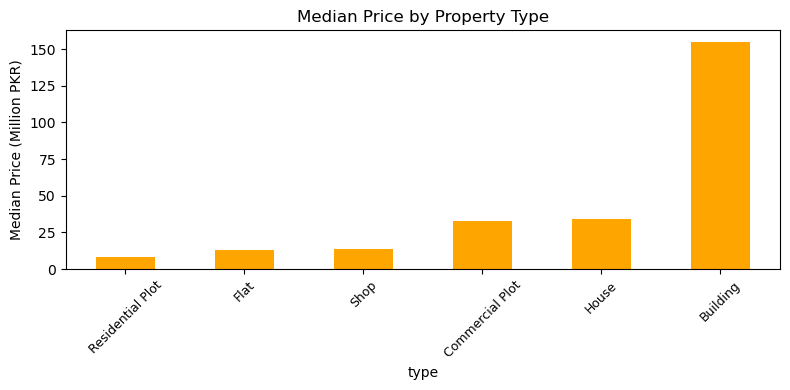

In [17]:
df.groupby("type")["price_million"].median().sort_values().plot(
    kind="bar", title="Median Price by Property Type", color='orange', figsize=(8,4)
)
plt.ylabel("Median Price (Million PKR)")
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()


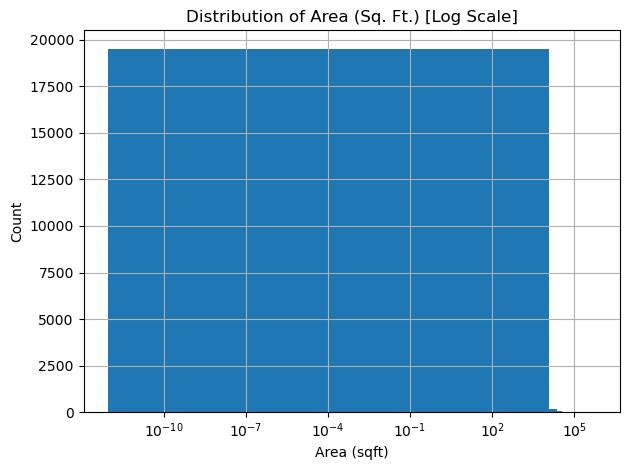

In [18]:
df["area_sqft"].hist(bins=50)
plt.xscale("log")  # 👈 This is key
plt.title("Distribution of Area (Sq. Ft.) [Log Scale]")
plt.xlabel("Area (sqft)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

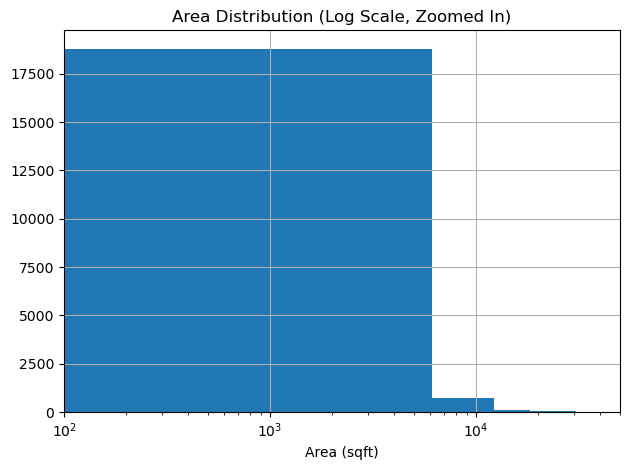

In [19]:
df["area_sqft"].hist(bins=100)
plt.xscale("log")
plt.xlim(100, 50000)  # Only show realistic range
plt.title("Area Distribution (Log Scale, Zoomed In)")
plt.xlabel("Area (sqft)")
plt.tight_layout()
plt.show()


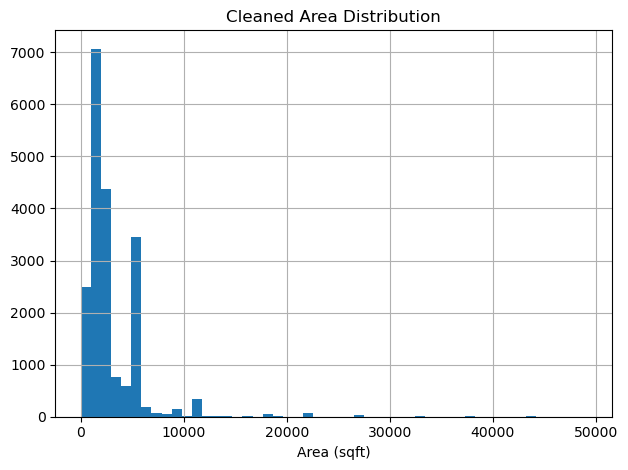

In [20]:
df = df[df["area_sqft"] <= 50000]  # keep realistic values

df["area_sqft"].hist(bins=50)
plt.title("Cleaned Area Distribution")
plt.xlabel("Area (sqft)")
plt.tight_layout()
plt.show()

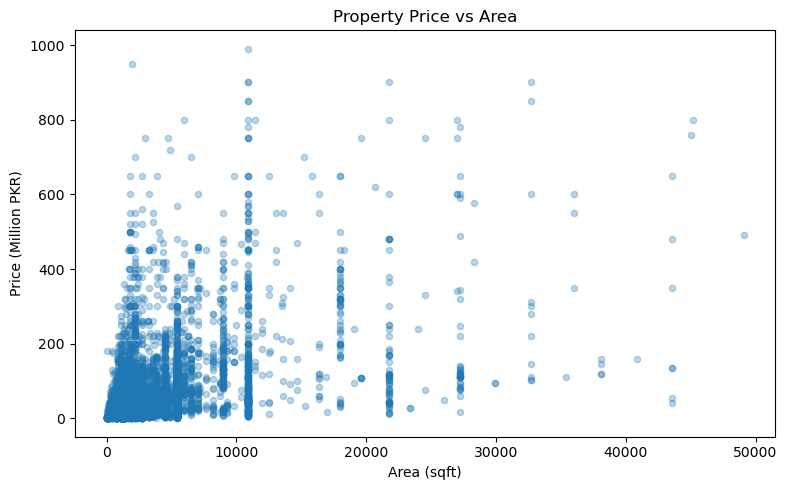

In [21]:
df.plot.scatter(x="area_sqft", y="price_million", alpha=0.3, figsize=(8,5))
plt.title("Property Price vs Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Million PKR)")
plt.tight_layout()
plt.show()

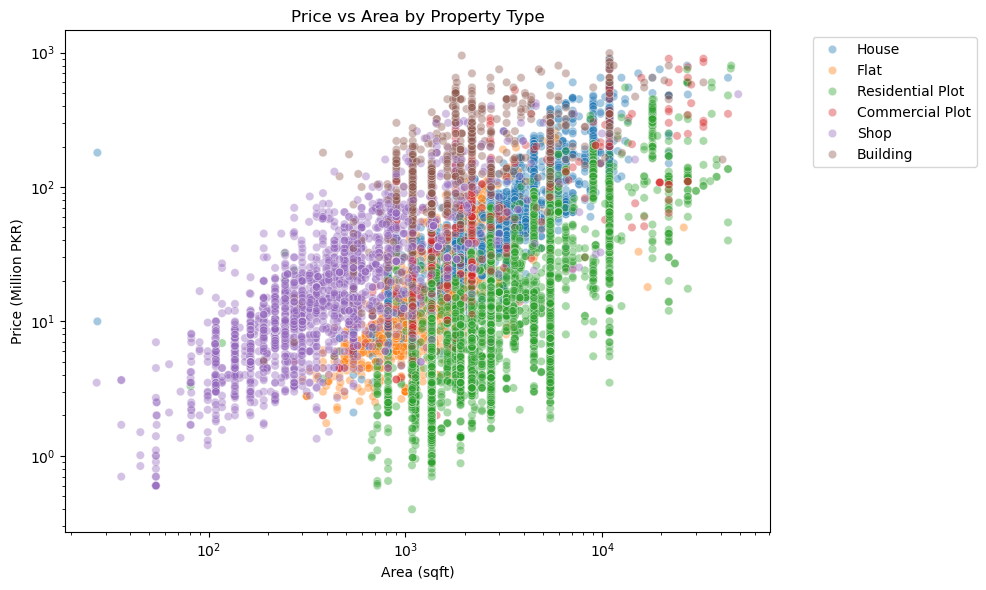

In [22]:
import seaborn as sns
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="area_sqft", y="price_million", hue="type", alpha=0.4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Million PKR)")
plt.title("Price vs Area by Property Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Prime Com\AppData\Local\Temp\ipykernel_6716\4141938910.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(["area_bin", "type"])["price_million"].median().unstack()


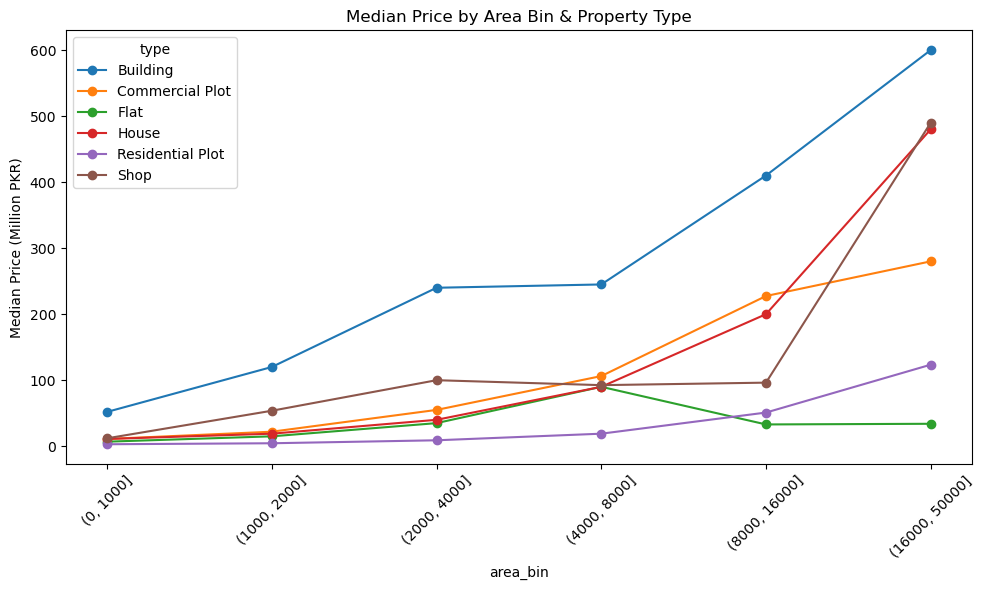

In [23]:
df["area_bin"] = pd.cut(df["area_sqft"], bins=[0, 1000, 2000, 4000, 8000, 16000, 50000])

pivot = df.groupby(["area_bin", "type"])["price_million"].median().unstack()

pivot.plot(kind="line", marker='o', figsize=(10,6))
plt.title("Median Price by Area Bin & Property Type")
plt.ylabel("Median Price (Million PKR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Step 1: Convert to string to normalize all values (including '-', '-1', etc.)
df['bedroom_clean'] = df['bedroom'].astype(str)

# Step 2: Replace all unwanted values (even '-1' or 'nan') with NaN
df['bedroom_clean'] = df['bedroom_clean'].replace(['-', '-1', 'nan', 'NaN', 'None'], np.nan)

# Step 3: Convert to numeric (anything invalid becomes NaN)
df['bedroom_clean'] = pd.to_numeric(df['bedroom_clean'], errors='coerce')

# Step 4: Define types where bedrooms make sense
valid_bedroom_types = ['House', 'Flat']

# Step 5: Compute median for valid types
median_bedroom = df.loc[df['type'].isin(valid_bedroom_types), 'bedroom_clean'].median()

# Step 6: Impute safely
df['bedroom_imputed'] = df.apply(
    lambda row: median_bedroom if pd.isna(row['bedroom_clean']) and row['type'] in valid_bedroom_types
    else 0 if pd.isna(row['bedroom_clean']) and row['type'] not in valid_bedroom_types
    else row['bedroom_clean'],
    axis=1
)

# Step 7: Convert to int
df['bedroom_imputed'] = df['bedroom_imputed'].astype(int)

# Final check
print(df['bedroom_imputed'].unique())


[ 7  6  4  3  2  5  9  1  8 11 10  0]


In [25]:
# Show how many properties of each type have 1, 2, 3... bedrooms
room_counts = df.groupby(['type', 'bedroom_imputed']).size().unstack(fill_value=0)

# Display the result
print(room_counts)


bedroom_imputed     0    1    2     3     4     5     6    7    8   9   10  11
type                                                                          
Building           487    8   13    21    20    13    17   10    7   1   2  51
Commercial Plot    531    0    0     0     0     0     0    0    0   0   0   0
Flat                 0  278  433   393    79    64     0    0    0   0   0   0
House                0    3  131  1085  1554  2647  1146  313  187  98  89  14
Residential Plot  8283    0    0     0     0     0     0    0    0   0   0   0
Shop              1624  122   24    17    10     8    11    6    4   2   2   9


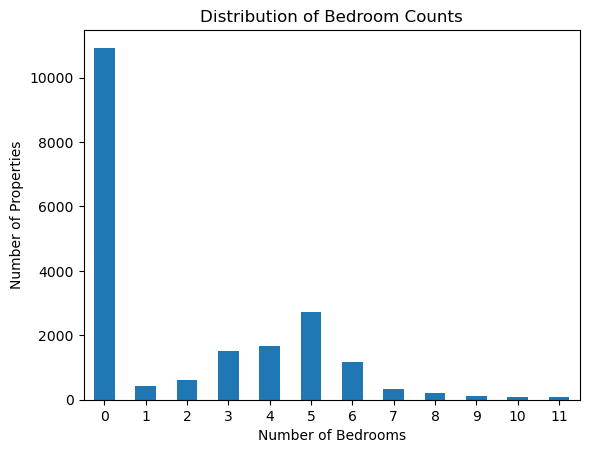

In [26]:
import matplotlib.pyplot as plt
df['bedroom_imputed'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Bedroom Counts")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Properties")
plt.xticks(rotation=0)
plt.show()


In [27]:
print(df['bedroom_imputed'].unique())


[ 7  6  4  3  2  5  9  1  8 11 10  0]


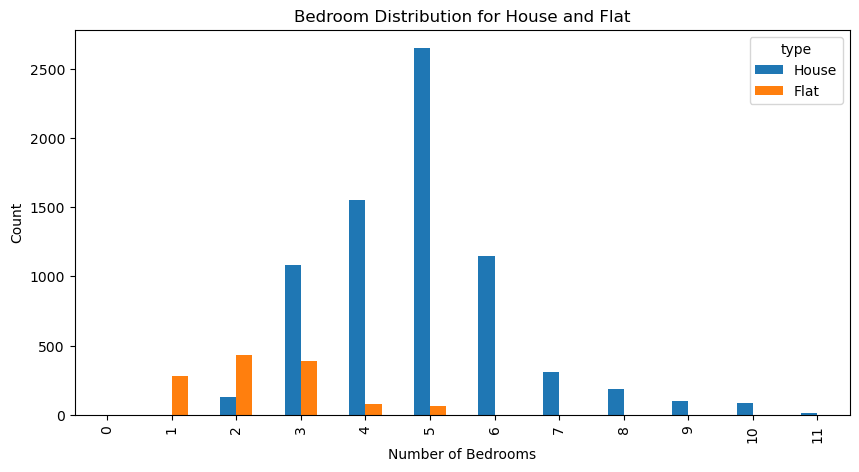

In [28]:
# Regenerate the table fresh
bedroom_dist = df.groupby(['type', 'bedroom_imputed']).size().unstack(fill_value=0)

# Now plot it
bedroom_dist.loc[['House', 'Flat']].T.plot(kind='bar', figsize=(10, 5))
plt.title("Bedroom Distribution for House and Flat")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()


In [29]:
df.head()

type bedroom bath     location location_city   location_province  \
0  House       7    6  DHA Defence     Islamabad   Islamabad Capital   
1  House       6    6         G-15     Islamabad   Islamabad Capital   
2  House       4    6         B-17     Islamabad   Islamabad Capital   
3  House       6    6  DHA Defence     Islamabad   Islamabad Capital   
4  House       4    4         G-13     Islamabad   Islamabad Capital   

   area_sqft  price_million  days_since_posted      area_bin  bedroom_clean  \
0    5445.00          190.0                  4  (4000, 8000]            7.0   
1    3865.95           60.0                  4  (2000, 4000]            6.0   
2    2178.00           26.5                  4  (2000, 4000]            4.0   
3    5445.00          117.0                  4  (4000, 8000]            6.0   
4    1905.75           58.0                  4  (1000, 2000]            4.0   

   bedroom_imputed  
0                7  
1                6  
2                4  
3                6  
4                4

In [30]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

# ---------------------------
# ✅ Custom Target Encoder
# ---------------------------
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, colname=None, n_splits=5):
        self.colname = colname
        self.n_splits = n_splits
        self.global_mean = None
        self.means = {}

    def fit(self, X, y):
        X = X.copy()
        self.global_mean = np.mean(y)
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        for train_idx, val_idx in kf.split(X):
            X_train, y_train = X.iloc[train_idx], y[train_idx]
            grouped = X_train[self.colname].to_frame()
            grouped['target'] = y_train
            means = grouped.groupby(self.colname)['target'].mean()
            self.means.update(means.to_dict())

        return self

    def transform(self, X):
        return X[[self.colname]].apply(lambda col: col.map(self.means).fillna(self.global_mean))

    def get_feature_names_out(self, input_features=None):
        return [f"{self.colname}_te"]

# ---------------------------
# ✅ Column Selection
# ---------------------------
target_encode_cols = ['location_city', 'location']
onehot_encode_cols = ['type', 'location_province']
numeric_cols = ['bedroom_imputed', 'bath', 'area_sqft', 'days_since_posted']

# ---------------------------
# ✅ Build ColumnTransformer
# ---------------------------
target_encoders = [
    (f"{col}_te", TargetEncoder(colname=col), [col])
    for col in target_encode_cols
]

onehot = ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_encode_cols)
numeric = ('numeric', 'passthrough', numeric_cols)

preprocessor = ColumnTransformer(
    transformers=target_encoders + [onehot, numeric]
)

# ---------------------------
# ✅ Fit and Transform
# ---------------------------
y = df['price_million'].values
X_array = preprocessor.fit_transform(df, y=y)
feature_names = preprocessor.get_feature_names_out()

# Clean column names (remove prefixes like 'onehot__')
clean_names = [name.split('__')[-1] for name in feature_names]

# Convert to DataFrame
df_encoded = pd.DataFrame(X_array, columns=clean_names)

# Add target back
df_encoded['price_million'] = y

# ✅ Ready for further feature engineering or modeling
df_encoded.head()

location_city_te location_te type_Building type_Commercial Plot type_Flat  \
0        68.096086   55.669655           0.0                  0.0       0.0   
1        68.096086   37.780556           0.0                  0.0       0.0   
2        68.096086   18.372618           0.0                  0.0       0.0   
3        68.096086   55.669655           0.0                  0.0       0.0   
4        68.096086   78.057333           0.0                  0.0       0.0   

  type_House type_Residential Plot type_Shop  \
0        1.0                   0.0       0.0   
1        1.0                   0.0       0.0   
2        1.0                   0.0       0.0   
3        1.0                   0.0       0.0   
4        1.0                   0.0       0.0   

  location_province_ Islamabad Capital location_province_ Khyber Pakhtunkhwa  \
0                                  1.0                                   0.0   
1                                  1.0                                   0.0   
2                                  1.0                                   0.0   
3                                  1.0                                   0.0   
4                                  1.0                                   0.0   

  location_province_ Punjab location_province_ Sindh bedroom_imputed bath  \
0                       0.0                      0.0               7    6   
1                       0.0                      0.0               6    6   
2                       0.0                      0.0               4    6   
3                       0.0                      0.0               6    6   
4                       0.0                      0.0               4    4   

  area_sqft days_since_posted  price_million  
0    5445.0                 4          190.0  
1   3865.95                 4           60.0  
2    2178.0                 4           26.5  
3    5445.0                 4          117.0  
4   1905.75                 4           58.0

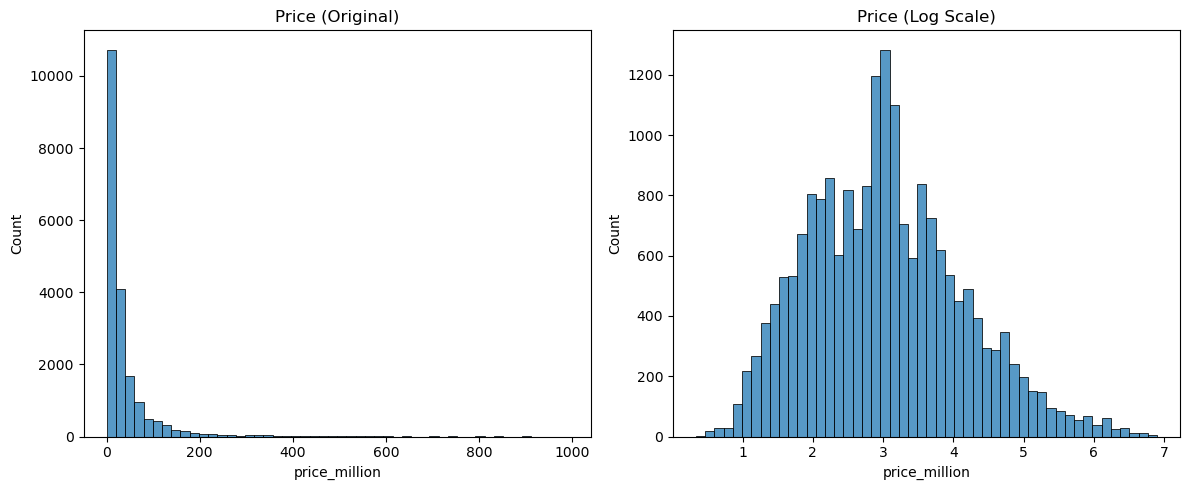

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_encoded["price_million"], bins=50, ax=axes[0])
axes[0].set_title("Price (Original)")

sns.histplot(np.log1p(df_encoded["price_million"]), bins=50, ax=axes[1])
axes[1].set_title("Price (Log Scale)")

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- 1. IQR-based Outlier Removal -----
def remove_outliers_iqr(df_encoded, col, factor=1.5):
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df_encoded[(df_encoded[col] >= lower) & (df_encoded[col] <= upper)]

# ----- 2. Apply to Copy of df -----
df_before = df_encoded.copy()
print(f"Original shape: {df_before.shape}")

df_cleaned = remove_outliers_iqr(df_before, "price_million", factor=1.5)
df_cleaned = remove_outliers_iqr(df_cleaned, "area_sqft", factor=1.5)

print(f"After outlier removal: {df_cleaned.shape}")
print(f"Rows removed: {df_before.shape[0] - df_cleaned.shape[0]}")

Original shape: (19817, 17)
After outlier removal: (14468, 17)
Rows removed: 5349


In [33]:
def feature_engineering(df_cleaned):
    df_cleaned = df_cleaned.copy()

    # Create log_price if not already there
    if 'log_price' not in df_cleaned.columns:
        df_cleaned['log_price'] = pd.to_numeric(df_cleaned['price_million'], errors='coerce')
        df_cleaned['log_price'] = np.log1p(df_cleaned['log_price'])

    # Create log_area if not already there
    if 'log_area' not in df_cleaned.columns:
        df_cleaned['log_area'] = pd.to_numeric(df_cleaned['area_sqft'], errors='coerce')
        df_cleaned['log_area'] = np.log1p(df_cleaned['log_area'])

    # price_per_sqft
    df_cleaned['price_per_sqft'] = (
        pd.to_numeric(df_cleaned['price_million'], errors='coerce') * 1e6
    ) / (pd.to_numeric(df_cleaned['area_sqft'], errors='coerce') + 1)

    # log_price_per_sqft
    df_cleaned['price_per_sqft'] = df_cleaned['price_per_sqft'].clip(lower=0)
    df_cleaned['log_price_per_sqft'] = np.log1p(df_cleaned['price_per_sqft'])

    # log_area_price_ratio
    df_cleaned['log_area_price_ratio'] = df_cleaned['log_price'] / (df_cleaned['log_area'] + 1e-6)

    return df_cleaned


In [34]:
df_fe = feature_engineering(df_cleaned)
df = df_fe.copy()
print(df[['log_price', 'log_area', 'log_price_per_sqft', 'log_area_price_ratio']].head())


   log_price  log_area  log_price_per_sqft  log_area_price_ratio
1   4.110874  8.260221            9.649698              0.497671
2   3.314186  7.686621            9.406116              0.431163
4   4.077537  7.553156           10.322831              0.539845
5   4.110874  8.260221            9.649698              0.497671
9   3.555348  7.256086           10.085827              0.489981


In [35]:
df.head()

location_city_te location_te type_Building type_Commercial Plot type_Flat  \
1        68.096086   37.780556           0.0                  0.0       0.0   
2        68.096086   18.372618           0.0                  0.0       0.0   
4        68.096086   78.057333           0.0                  0.0       0.0   
5        68.096086   37.780556           0.0                  0.0       0.0   
9        68.096086   73.652381           0.0                  0.0       1.0   

  type_House type_Residential Plot type_Shop  \
1        1.0                   0.0       0.0   
2        1.0                   0.0       0.0   
4        1.0                   0.0       0.0   
5        1.0                   0.0       0.0   
9        0.0                   0.0       0.0   

  location_province_ Islamabad Capital location_province_ Khyber Pakhtunkhwa  \
1                                  1.0                                   0.0   
2                                  1.0                                   0.0   
4                                  1.0                                   0.0   
5                                  1.0                                   0.0   
9                                  1.0                                   0.0   

   ... bedroom_imputed bath area_sqft days_since_posted price_million  \
1  ...               6    6   3865.95                 4          60.0   
2  ...               4    6    2178.0                 4          26.5   
4  ...               4    4   1905.75                 4          58.0   
5  ...               6    6   3865.95                 4          60.0   
9  ...               2    3    1415.7                 4          34.0   

  log_price  log_area  price_per_sqft  log_price_per_sqft  \
1  4.110874  8.260221    15516.104423            9.649698   
2  3.314186  7.686621    12161.541992            9.406116   
4  4.077537  7.553156    30418.250951           10.322831   
5  4.110874  8.260221    15516.104423            9.649698   
9  3.555348  7.256086    23999.435307           10.085827   

   log_area_price_ratio  
1              0.497671  
2              0.431163  
4              0.539845  
5              0.497671  
9              0.489981  

[5 rows x 22 columns]

In [36]:
# Copy to avoid altering original
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')  # Ensure it's numeric

# Step 1: Set up condition masks
mask_plot_residential = (df['bath'].isna()) & (df['type_Residential Plot'] == 1)
mask_shop = (df['bath'].isna()) & (df['type_Shop'] == 1)
mask_commercial_plot = (df['bath'].isna()) & (df['type_Commercial Plot'] == 1)
mask_building = (df['bath'].isna()) & (df['type_Building'] == 1)
mask_house = (df['bath'].isna()) & (df['type_House'] == 1)
mask_flat = (df['bath'].isna()) & (df['type_Flat'] == 1)

# Step 2: Compute means
house_mean_bath = df.loc[df['type_House'] == 1, 'bath'].mean()
flat_mean_bath = df.loc[df['type_Flat'] == 1, 'bath'].mean()

# Step 3: Impute accordingly
df.loc[mask_plot_residential, 'bath'] = 0
df.loc[mask_shop, 'bath'] = 0
df.loc[mask_commercial_plot, 'bath'] = 0
df.loc[mask_building, 'bath'] = 0
df.loc[mask_house, 'bath'] = round(house_mean_bath)
df.loc[mask_flat, 'bath'] = round(flat_mean_bath)
print("✅ Remaining missing in 'bath':", df['bath'].isna().sum())


✅ Remaining missing in 'bath': 0


📊 Model Performance:
R² Score : 0.8210
MAE      : 5.3825
RMSE     : 7.3561


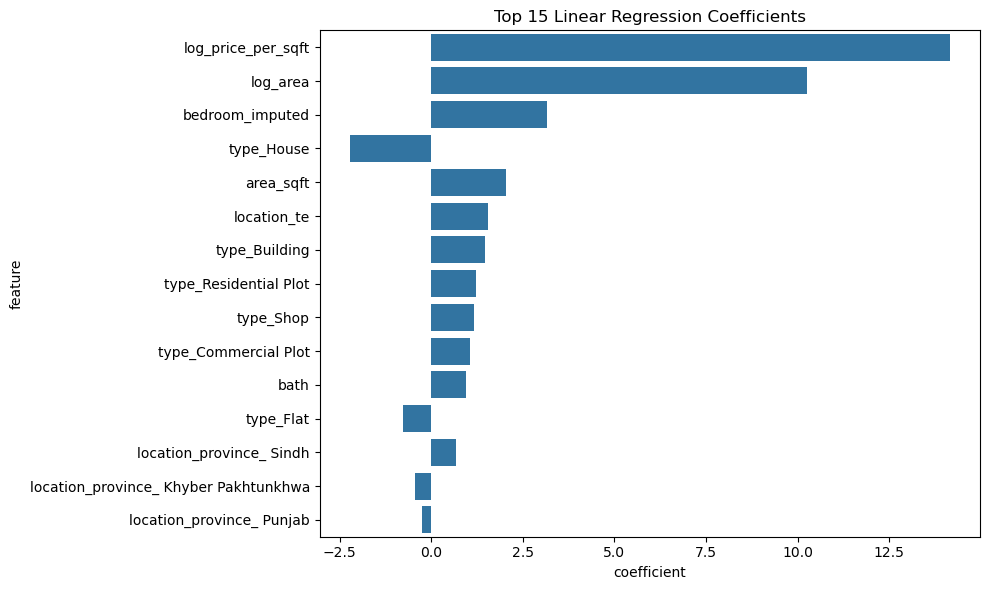

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Select and Prepare Features
# -------------------------------

# Main numeric features
numeric_cols = [
    'location_city_te', 'location_te',
    'bedroom_imputed', 'bath', 'area_sqft', 'days_since_posted',
    'log_area', 'log_price_per_sqft', 'log_area_price_ratio'
]

# Encoded categorical columns (already one-hot encoded)
dummy_cols = [col for col in df.columns if col.startswith('type_') or col.startswith('location_province_')]

# Final feature list
final_features = numeric_cols + dummy_cols

# Convert relevant columns to numeric
df[final_features] = df[final_features].apply(pd.to_numeric, errors='coerce')

# -------------------------------
# Step 2: Define X and y
# -------------------------------
X = df[final_features]
y = df['price_million']

# -------------------------------
# Step 3: Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 4: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 5: Train Linear Regression
# -------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# -------------------------------
# Step 6: Evaluate Model
# -------------------------------
y_pred = lr_model.predict(X_test_scaled)

print("📊 Model Performance:")
print(f"R² Score : {r2_score(y_test, y_pred):.4f}")
print(f"MAE      : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# -------------------------------
# Step 7: Coefficients (Optional)
# -------------------------------
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(15), x='coefficient', y='feature')
plt.title("Top 15 Linear Regression Coefficients")
plt.tight_layout()
plt.show()


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Subset only numeric columns for VIF
vif_features = [
    'location_city_te', 'location_te', 'bedroom_imputed', 'bath',
    'area_sqft', 'days_since_posted',
    'log_area', 'log_price_per_sqft', 'log_area_price_ratio'
]

# Add dummy variables too (you can choose top 5-10 to keep it readable)
dummy_cols = [col for col in df.columns if col.startswith('type_') or col.startswith('location_province_')]
vif_features += dummy_cols

# Ensure numeric format
X_vif = df[vif_features].apply(pd.to_numeric, errors='coerce').dropna()

# Add constant term (required by VIF)
X_vif_const = add_constant(X_vif)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i + 1) for i in range(X_vif.shape[1])]

# Sort and display
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("🔍 VIF Scores:")
print(vif_data)


🔍 VIF Scores:
                                  Feature        VIF
16  location_province_ Khyber Pakhtunkhwa        inf
10                   type_Commercial Plot        inf
9                           type_Building        inf
17              location_province_ Punjab        inf
18               location_province_ Sindh        inf
12                             type_House        inf
15   location_province_ Islamabad Capital        inf
14                              type_Shop        inf
13                  type_Residential Plot        inf
11                              type_Flat        inf
3                                    bath  16.522163
2                         bedroom_imputed  12.239700
6                                log_area  10.160420
4                               area_sqft   6.510533
7                      log_price_per_sqft   4.316812
0                        location_city_te   2.161727
1                             location_te   1.371707
8                    log_area_pr

C:\Users\Prime Com\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [39]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ------------------------------------------------------------------------------
# 0.  CONFIG – name the columns that define your one‑hot groups
# ------------------------------------------------------------------------------

# every column that starts with these prefixes belongs to the same category
onehot_prefixes = ["type_", "location_province_"]

# ------------------------------------------------------------------------------
# 1.  Build a feature list that keeps (k‑1) dummies for each group
# ------------------------------------------------------------------------------

numeric_base = [
    "bedroom_imputed", "bath", "area_sqft", "days_since_posted",
    "log_area", "log_price_per_sqft", "log_area_price_ratio",
    "location_city_te", "location_te"
]

# find all dummy columns
dummy_cols = [c for c in df.columns if any(c.startswith(p) for p in onehot_prefixes)]

# for every prefix keep all but the FIRST column (sorted) --> avoids perfect collinearity
dummies_kept = []
for prefix in onehot_prefixes:
    group = sorted([c for c in dummy_cols if c.startswith(prefix)])
    #   keep everything except group[0]
    dummies_kept += group[1:]

final_features = numeric_base + dummies_kept
print(f"📝  Using {len(final_features)} features (dummies trap avoided).")

# ------------------------------------------------------------------------------
# 2.  Prepare X for VIF  -----------------------------------------------
# ------------------------------------------------------------------------------

X_vif = (
    df[final_features]
    .apply(pd.to_numeric, errors="coerce")   # make sure every column is numeric
    .dropna()                                # drop rows with remaining NaNs
)

# Add intercept term required by statsmodels’ VIF
X_vif_const = add_constant(X_vif)

# ------------------------------------------------------------------------------
# 3.  Compute VIF ---------------------------------------------------------------
# ------------------------------------------------------------------------------

vif_df = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [
        variance_inflation_factor(X_vif_const.values, i + 1)  # +1 because const is col 0
        for i in range(X_vif.shape[1])
    ]
}).sort_values("VIF", ascending=False)

# ------------------------------------------------------------------------------
# 4.  Display -------------------------------------------------------------------
# ------------------------------------------------------------------------------

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
print("\n🔍  Variance Inflation Factors (VIF)")
print(vif_df.to_string(index=False))


📝  Using 17 features (dummies trap avoided).

🔍  Variance Inflation Factors (VIF)
                              Feature   VIF
                type_Residential Plot 30.29
                           type_House 27.98
                                 bath 16.52
                            type_Shop 12.50
                      bedroom_imputed 12.24
                             log_area 10.16
                            type_Flat  9.20
                            area_sqft  6.51
                   log_price_per_sqft  4.32
            location_province_ Punjab  4.24
                 type_Commercial Plot  3.68
             location_province_ Sindh  2.57
location_province_ Khyber Pakhtunkhwa  2.28
                     location_city_te  2.16
                          location_te  1.37
                 log_area_price_ratio  1.07
                    days_since_posted  1.03


In [40]:
# Keep all except one (e.g., drop Commercial Plot)
selected_features = [
    "type_House", "type_Flat", "type_Shop", "type_Residential Plot",  # <- keep these
    # Drop 'type_Commercial Plot' as the baseline

    "bath", "bedroom_imputed", "area_sqft", "days_since_posted",
    "location_city_te", "location_te",
    "location_province_ Punjab", "location_province_ Sindh", "location_province_ Khyber Pakhtunkhwa",
    "log_price_per_sqft", "log_area_price_ratio"
]

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Select Features + Target
X = df[selected_features].apply(pd.to_numeric, errors='coerce')
y = df['log_price']

# Drop missing rows (or use imputation)
X = X.dropna()
y = y.loc[X.index]

# Step 2: Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Step 4: Predict and Evaluate
y_pred_log = lr.predict(X_test_scaled)

print("📊 Performance (log target):")
print(f"R² Score : {r2_score(y_test, y_pred_log):.4f}")
print(f"MAE      : {mean_absolute_error(y_test, y_pred_log):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_log)):.4f}")

# Step 5: Reverse transform for real-world scale
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

print("\n📊 Real-Scale Evaluation:")
print(f"R² Score : {r2_score(y_test_real, y_pred_real):.4f}")
print(f"MAE      : {mean_absolute_error(y_test_real, y_pred_real):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test_real, y_pred_real)):.4f}")

📊 Performance (log target):
R² Score : 0.9456
MAE      : 0.1121
RMSE     : 0.2005

📊 Real-Scale Evaluation:
R² Score : 0.9066
MAE      : 2.4017
RMSE     : 5.3139


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --------------------------
# 1. Feature list (as before)
# --------------------------
selected_features = [
    "type_House", "type_Flat", "type_Shop", "type_Residential Plot",  # keep these
    "bath", "bedroom_imputed", "area_sqft", "days_since_posted",
    "location_city_te", "location_te",
    "location_province_ Punjab", "location_province_ Sindh", "location_province_ Khyber Pakhtunkhwa",
    "log_price_per_sqft", "log_area_price_ratio"
]

# --------------------------
# 2. Prepare data
# --------------------------
X = df[selected_features].apply(pd.to_numeric, errors='coerce')
y = df["log_price"]

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

# --------------------------
# 3. Train/test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 4. Train Random Forest
# --------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --------------------------
# 5. Predict
# --------------------------
y_pred_log = rf_model.predict(X_test)

# --------------------------
# 6. Evaluate in log scale
# --------------------------
print("📊 Performance (log target):")
print(f"R² Score : {r2_score(y_test, y_pred_log):.4f}")
print(f"MAE      : {mean_absolute_error(y_test, y_pred_log):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_log)):.4f}")

# --------------------------
# 7. Back-transform predictions
# --------------------------
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# --------------------------
# 8. Evaluate in real scale
# --------------------------
print("\n📊 Real-Scale Evaluation:")
print(f"R² Score : {r2_score(y_test_real, y_pred_real):.4f}")
print(f"MAE      : {mean_absolute_error(y_test_real, y_pred_real):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test_real, y_pred_real)):.4f}")

📊 Performance (log target):
R² Score : 0.9998
MAE      : 0.0047
RMSE     : 0.0118

📊 Real-Scale Evaluation:
R² Score : 0.9994
MAE      : 0.1179
RMSE     : 0.4349


In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --------------------------
# 1. Define feature set
# --------------------------
selected_features = [
    "type_House", "type_Flat", "type_Shop", "type_Residential Plot",  # drop one type (baseline)
    "bath", "bedroom_imputed", "area_sqft", "days_since_posted",
    "location_city_te", "location_te",
    "location_province_ Punjab", "location_province_ Sindh", "location_province_ Khyber Pakhtunkhwa",
    "log_price_per_sqft", "log_area_price_ratio"
]

# --------------------------
# 2. Prepare the data
# --------------------------
X = df[selected_features].apply(pd.to_numeric, errors='coerce')
y = df["log_price"]

X = X.dropna()
y = y.loc[X.index]

# --------------------------
# 3. Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 4. Train XGBoost Regressor
# --------------------------
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# --------------------------
# 5. Predict and Evaluate (Log Scale)
# --------------------------
y_pred_log = xgb_model.predict(X_test)

print("📊 Performance (log target):")
print(f"R² Score : {r2_score(y_test, y_pred_log):.4f}")
print(f"MAE      : {mean_absolute_error(y_test, y_pred_log):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_log)):.4f}")

# --------------------------
# 6. Back-transform and Evaluate (Real Scale)
# --------------------------
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

print("\n📊 Real-Scale Evaluation:")
print(f"R² Score : {r2_score(y_test_real, y_pred_real):.4f}")
print(f"MAE      : {mean_absolute_error(y_test_real, y_pred_real):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test_real, y_pred_real)):.4f}")

📊 Performance (log target):
R² Score : 0.9994
MAE      : 0.0126
RMSE     : 0.0213

📊 Real-Scale Evaluation:
R² Score : 0.9978
MAE      : 0.2895
RMSE     : 0.8186


C:\Users\Prime Com\AppData\Local\Temp\ipykernel_6716\2204613565.py:70: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Prime Com\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


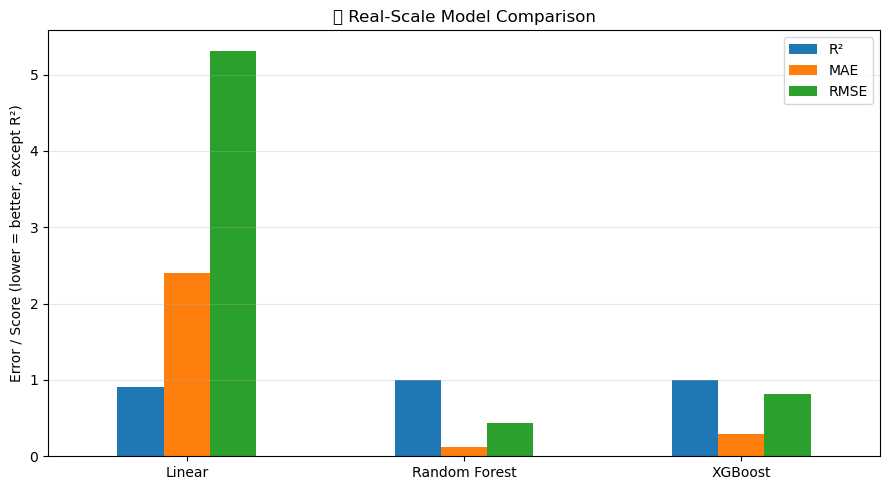

C:\Users\Prime Com\AppData\Local\Temp\ipykernel_6716\2204613565.py:70: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Prime Com\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


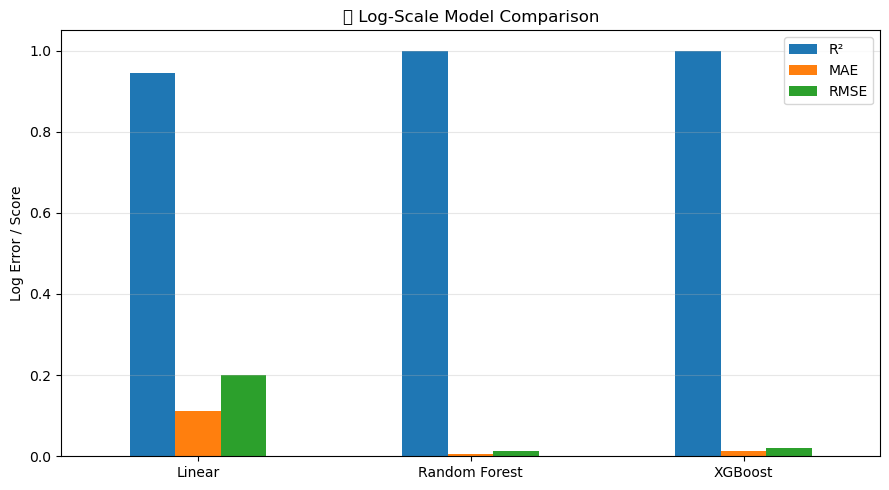


📋 Model Comparison Summary (Real-Scale):
                R²  MAE  RMSE
Linear        0.91 2.40  5.31
Random Forest 1.00 0.12  0.43
XGBoost       1.00 0.29  0.82

📋 Model Comparison Summary (Log-Scale):
                R²  MAE  RMSE
Linear        0.95 0.11  0.20
Random Forest 1.00 0.01  0.01
XGBoost       1.00 0.01  0.02


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -----------------------------
# 1. Train Linear Regression
# -----------------------------
# Assume X (15 selected features) and y (log_price) are ready
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# -----------------------------
# 2. Make Predictions (log scale)
# -----------------------------
y_pred_log_lin = lr_model.predict(X_test_scaled)
y_pred_log_rf  = rf_model.predict(X_test)     # Already trained
y_pred_log_xgb = xgb_model.predict(X_test)    # Already trained

# -----------------------------
# 3. Convert to Real Scale
# -----------------------------
y_test_real     = np.expm1(y_test)
y_pred_lin_real = np.expm1(y_pred_log_lin)
y_pred_rf_real  = np.expm1(y_pred_log_rf)
y_pred_xgb_real = np.expm1(y_pred_log_xgb)

# -----------------------------
# 4. Evaluation Function
# -----------------------------
def evaluate(y_true, y_preds):
    return {
        "R²":   r2_score(y_true, y_preds),
        "MAE":  mean_absolute_error(y_true, y_preds),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_preds))
    }

# -----------------------------
# 5. Evaluate & Compare Models
# -----------------------------
results_real = {
    "Linear"       : evaluate(y_test_real, y_pred_lin_real),
    "Random Forest": evaluate(y_test_real, y_pred_rf_real),
    "XGBoost"      : evaluate(y_test_real, y_pred_xgb_real)
}

results_log = {
    "Linear"       : evaluate(y_test, y_pred_log_lin),
    "Random Forest": evaluate(y_test, y_pred_log_rf),
    "XGBoost"      : evaluate(y_test, y_pred_log_xgb)
}

# -----------------------------
# 6. Visualization
# -----------------------------
def plot_results(df, title, ylabel):
    ax = df.plot(kind='bar', figsize=(9,5), title=title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

df_real = pd.DataFrame(results_real).T
df_log  = pd.DataFrame(results_log).T

plot_results(df_real, "📊 Real-Scale Model Comparison", "Error / Score (lower = better, except R²)")
plot_results(df_log,  "📊 Log-Scale Model Comparison",  "Log Error / Score")

# -----------------------------
# 7. Print Summary Comparison
# -----------------------------
print("\n📋 Model Comparison Summary (Real-Scale):")
print(df_real.round(3))

print("\n📋 Model Comparison Summary (Log-Scale):")
print(df_log.round(3))

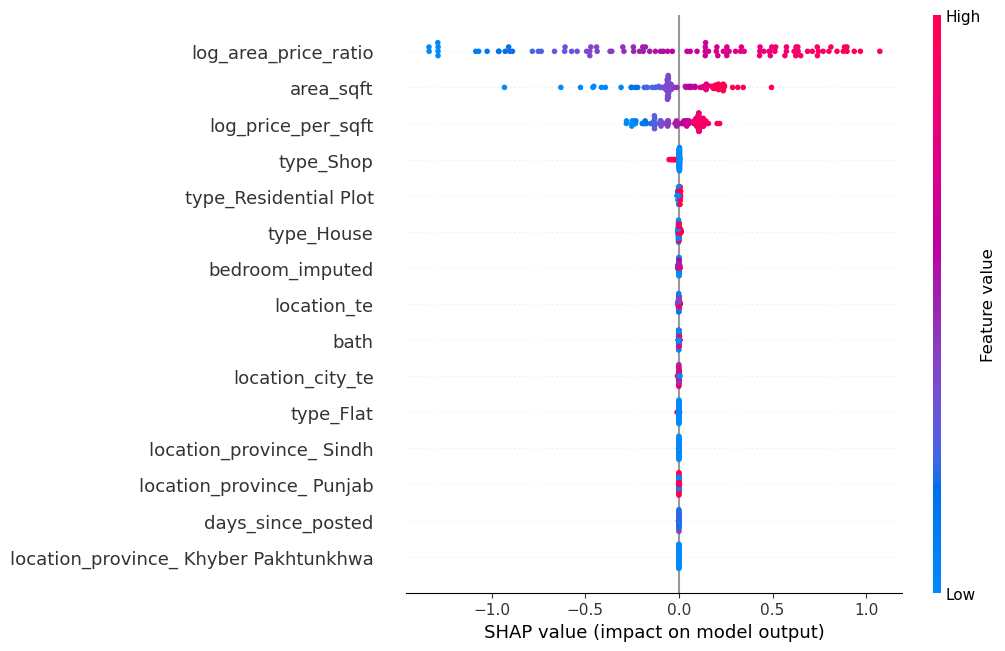

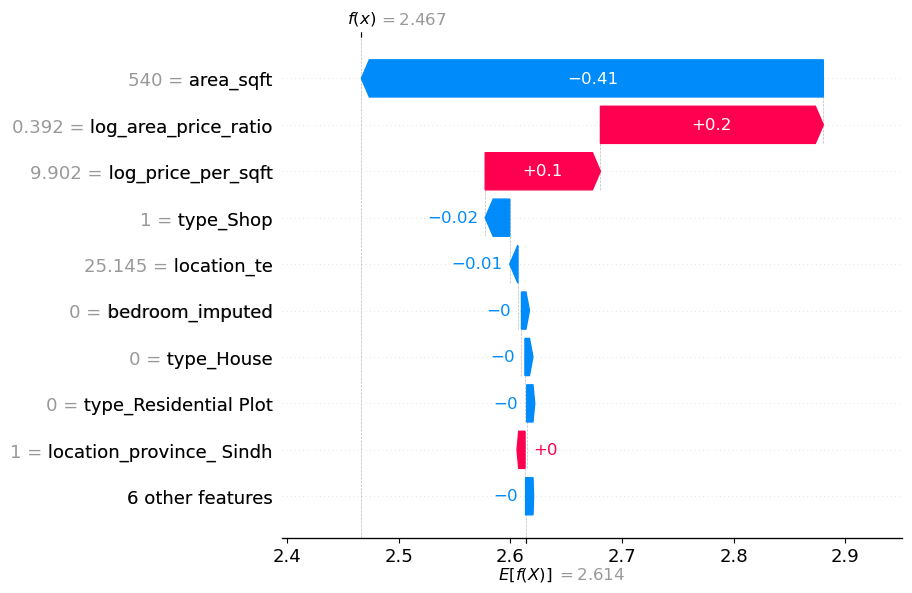

In [45]:
# 1️⃣ Imports
import shap
import numpy as np
import matplotlib.pyplot as plt

# 2️⃣ Initialize SHAP
shap.initjs()

# 3️⃣ Sample for explanation (faster + cleaner)
X_sample = X_test.sample(100, random_state=42)

# 4️⃣ Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model, X_sample)

# 5️⃣ Calculate SHAP values
shap_values = explainer(X_sample)

# 6️⃣ Global Interpretation (beeswarm plot)
shap.plots.beeswarm(shap_values, max_display=15)

# 7️⃣ Optional: Explain one prediction (e.g. row 10)
shap.plots.waterfall(shap_values[10])

In [46]:
import os
import joblib

# Replace these with your trained model and fitted scaler
# Example:
# xgb_model = your trained XGBoost model
# scaler = your fitted StandardScaler

# 1️⃣ Create the models folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# 2️⃣ Save the XGBoost model
joblib.dump(xgb_model, "models/xgb_model.pkl")

# 3️⃣ Save the StandardScaler
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Model and scaler saved to 'models/' folder.")


✅ Model and scaler saved to 'models/' folder.
